<a href="https://colab.research.google.com/github/rvfalves/DIO_IA-Bootcamp/blob/main/DIO_Challenge_Learning_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
!pip install -q tensorflow  #2.0.0-beta1

In [93]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf

import numpy as np

import seaborn as sns

import pandas as pd

In [94]:
tf.__version__

'2.18.0'

In [95]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [96]:
logdir='log'

In [97]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes=[0,1,2,3,4,5,6,7,8,9]

Splitting train images list in two new lists: one for trainning and another for validation, in a rate of 5:1 objects.

In [98]:
train_im = train_images[:50000]
val_im = train_images[50000:]
train_lab = train_labels[:50000]
val_lab = train_labels[50000:]

In [99]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [100]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [101]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=train_im,
            y=train_lab,
            epochs=5,
            validation_data=(val_im, val_lab))

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8788 - loss: 0.3831 - val_accuracy: 0.9772 - val_loss: 0.0738
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9815 - loss: 0.0571 - val_accuracy: 0.9844 - val_loss: 0.0485
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9904 - loss: 0.0325 - val_accuracy: 0.9872 - val_loss: 0.0449
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9909 - loss: 0.0268 - val_accuracy: 0.9915 - val_loss: 0.0303
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9942 - loss: 0.0196 - val_accuracy: 0.9889 - val_loss: 0.0386


In [102]:
y_true=test_labels
y_pred = np.argmax(model.predict(test_images), axis=-1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [103]:
classes=[0,1,2,3,4,5,6,7,8,9]

Creating a confusion matrix with results of tha classification done by the model.

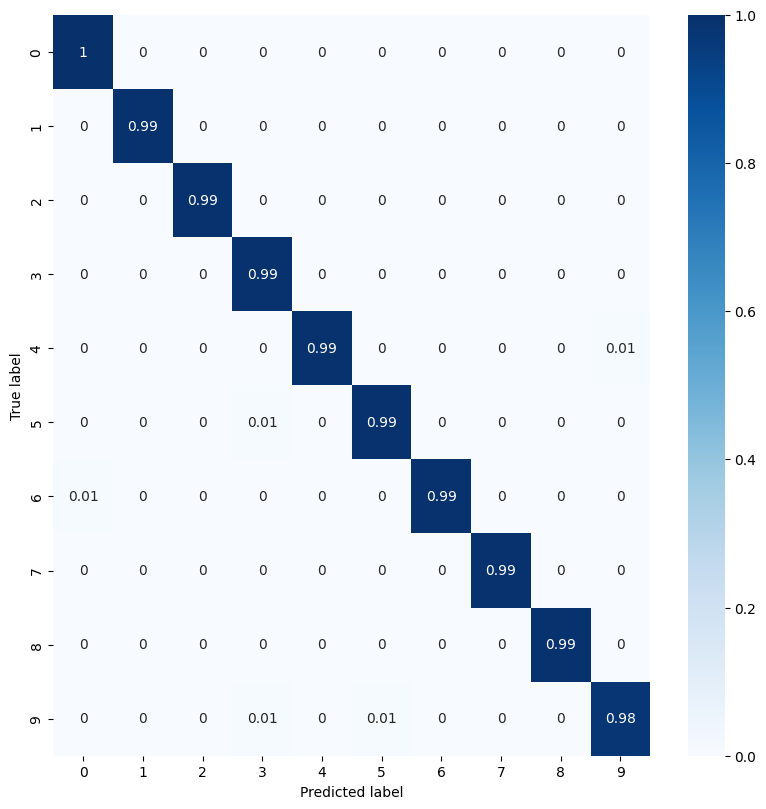

In [104]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes,
                     columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Calculating some Learning Matrics for the model results:

In [105]:
print(con_mat)


[[ 979    0    0    0    0    0    0    1    0    0]
 [   0 1128    1    3    0    1    0    1    1    0]
 [   1    1 1024    2    0    0    0    3    1    0]
 [   0    0    1 1004    0    4    0    0    1    0]
 [   0    0    0    0  975    0    1    0    0    6]
 [   1    0    0    6    0  883    2    0    0    0]
 [   6    1    0    0    1    0  949    0    1    0]
 [   0    1    3    2    0    0    0 1021    0    1]
 [   2    0    2    0    0    0    0    0  969    1]
 [   0    1    0    6    4    7    0    2    1  988]]


In [106]:
success = 0
mistake = 0
for row in range(10):
  for column in range(10):
    if column == row:
      success += con_mat[row][column]
    else:
      mistake += con_mat[row][column]

print(success)
print(mistake)

9920
80


In [107]:
accuracy = success / (success + mistake)
print(accuracy)

0.992


In [108]:
TP = []
FN = []
for row in range(10):
  false_neg = 0
  for column in range(10):
    if column == row:
      TP.append(con_mat[row][column])
    else:
      false_neg += con_mat[row][column]
  FN.append(false_neg)

print(f'True Positive: {TP}')
print(f'False Negative: {FN}')

True Positive: [979, 1128, 1024, 1004, 975, 883, 949, 1021, 969, 988]
False Negative: [1, 7, 8, 6, 7, 9, 9, 7, 5, 21]


In [109]:
recall_mean = 0
recall=[]
for row in range(10):
  recall.append(TP[row] / (TP[row] + FN[row]))
  recall_mean += TP[row] / (TP[row] + FN[row])
recall_mean = recall_mean/10
print(f'Recall: {recall}')
print(f'recall or sensibility mean:  {recall_mean}')


Recall: [0.9989795918367347, 0.9938325991189427, 0.9922480620155039, 0.994059405940594, 0.9928716904276986, 0.9899103139013453, 0.9906054279749478, 0.9931906614785992, 0.9948665297741273, 0.979187314172448]
recall or sensibility mean:  0.9919751596640941


In [110]:
TP = []
FP = []
TN = []
for column in range(10):
  false_pos = 0
  true_neg = 0
  for row in range(10):
    if column == row:
      TP.append(con_mat[row][column])
    else:
      false_pos += con_mat[row][column]
      for column_alter in range(10):
        if column_alter != column:
          true_neg += con_mat[row][column_alter]
  FP.append(false_pos)
  TN.append(true_neg)

print(f'True Positive: {TP}')
print(f'False Positive: {FP}')
print(f'True Negative: {TN}')

True Positive: [979, 1128, 1024, 1004, 975, 883, 949, 1021, 969, 988]
False Positive: [10, 4, 7, 19, 5, 12, 3, 7, 5, 8]
True Negative: [9010, 8861, 8961, 8971, 9013, 9096, 9039, 8965, 9021, 8983]


In [111]:
precision_mean = 0
specificity_mean = 0
precision=[]
specificity=[]
for column in range(10):
  precision.append(TP[column] / (TP[column] + FP[column]))
  specificity.append(TN[column] / (TN[column] + FP[column]))
  precision_mean += TP[column] / (TP[column] + FP[column])
  specificity_mean += TN[column] / (TN[column] + FP[column])
precision_mean = precision_mean/10
specificity_mean = specificity_mean/10
print(f'Precision: {precision}')
print(f'Precision mean:  {precision_mean}')
print(f'Specificity: {specificity}')
print(f'Specificity mean:  {specificity_mean}')

Precision: [0.9898887765419616, 0.9964664310954063, 0.9932104752667313, 0.9814271749755621, 0.9948979591836735, 0.9865921787709497, 0.9968487394957983, 0.9931906614785992, 0.9948665297741273, 0.9919678714859438]
Precision mean:  0.9919356798068752
Specificity: [0.9988913525498891, 0.9995487873660462, 0.9992194469223907, 0.9978865406006674, 0.9994455533377689, 0.9986824769433466, 0.9996682149966821, 0.9992197949175212, 0.9994460447595834, 0.9991102213324435]
Specificity mean:  0.999111843372634


In [112]:
f_score = 2*(precision_mean*recall_mean)/(precision_mean+recall_mean)
print(f'Specificity: {f_score}')

Specificity: 0.9919554193426597


[0.9989795918367347, 0.9938325991189427, 0.9922480620155039, 0.994059405940594, 0.9928716904276986, 0.9899103139013453, 0.9906054279749478, 0.9931906614785992, 0.9948665297741273, 0.979187314172448]
[0.0011086474501108556, 0.000451212633953757, 0.0007805530776092695, 0.0021134593993326067, 0.000554446662231145, 0.0013175230566534468, 0.00033178500331787486, 0.0007802050824787798, 0.0005539552404165704, 0.0008897786675564623]


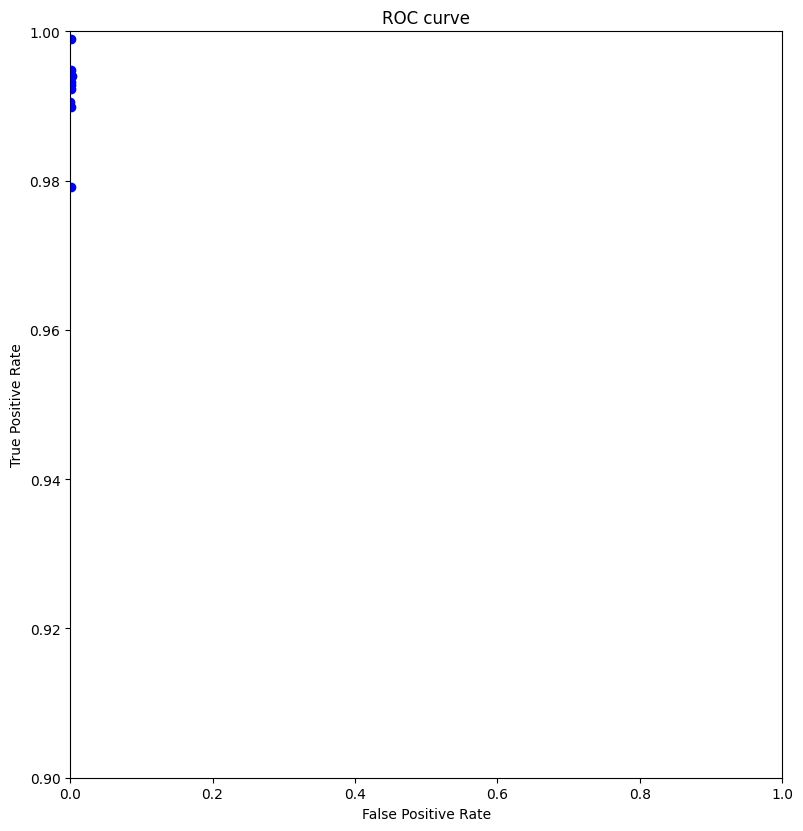

In [113]:
FP_rate = [1-i for i in specificity]
print(recall)
print(FP_rate)
figure = plt.figure(figsize=(8, 8))
plt.plot(FP_rate,recall, color='blue', marker='o', linestyle='')
plt.tight_layout()
plt.xlim(0, 1)
plt.ylim(0.9, 1)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC curve")
plt.show()